In [105]:
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())

In [106]:
from typing import Sequence
from langchain.schema import BaseMessage, HumanMessage
from langgraph.graph import END, MessageGraph
from chains import generation_chain, reflection_chain

In [107]:
REFLECT = "reflect"
GENERATE = "generate"

In [168]:
def generation_node(state: Sequence[BaseMessage]):
    print(f"Node 1:_____________ GENERATION NODE _____________")
    res = generation_chain.invoke({"messages": state})
    print(res.content)
    print()
    print()
    print()
    return res

In [169]:
def reflection_node(state: Sequence[BaseMessage]):
    print(f"Node 2:______________ REFLECTION NODE ____________")
    res = reflection_chain.invoke({"messages": state})
    print(res.content) 
    print()
    print()
    print()
    return [HumanMessage(content=res.content)]

In [170]:
builder = MessageGraph()

In [171]:
builder.add_node(GENERATE, generation_node)
builder.add_node(REFLECT, reflection_node)

In [172]:
builder.set_entry_point(GENERATE)

In [173]:
def should_continue(state: Sequence[BaseMessage]):
    print(f"Conditional Edge:_____________ SHOULD CONTINUE EDGE _____________")
    if 6 <= len(state):
        print(f"Path 2:_____________ END _____________")
        return END
    print(f"Path 1:_____________ REFLECT_____________")
    print()
    print()
    print()
    return REFLECT

In [174]:
builder.add_conditional_edges(GENERATE, should_continue)

In [175]:
builder.add_edge(REFLECT, GENERATE)

In [176]:
graph = builder.compile()

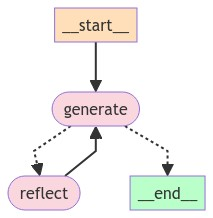

In [47]:
from IPython.display import Image, display

try:
    # This will only work in .ipynb
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
    # raise FileNotFoundError("File not found!")  # Throw FileNotFoundError
except:
    # This requires some extra dependencies and is optional
    print("NOTE: You need to paste this output in mermaid live editor to see the graph!")
    print(graph.get_graph().draw_mermaid())

In [177]:
inputs = HumanMessage(content="""Make this tweet better: 
                      OpenAI released function calling a few months ago, 
                      and it's been a major  upgrade for AI projects. 
                      It's a new  capability that connects language models to external functions, 
                      enabling  them to access external info and perform complex tasks. 
                      Let's dive into this thread 🧵!""")

In [178]:
response = graph.invoke(inputs)

Node 1:_____________ GENERATION NODE _____________
"Exciting news from OpenAI! Their latest function calling feature, released a few months back, has revolutionized AI projects. This new capability seamlessly connects language models to external functions, unlocking access to external data and enabling the execution of intricate tasks. Dive into this thread with me 🧵! #OpenAI #AI #Innovation"



Conditional Edge:_____________ SHOULD CONTINUE EDGE _____________
Path 1:_____________ REFLECT_____________



Node 2:______________ REFLECTION NODE ____________
This revised tweet captures the essence of OpenAI's new function calling feature effectively. To enhance the tweet further, consider the following recommendations:

1. **Engaging Opener**: Begin the tweet with a catchy and engaging opener to capture the audience's attention. For example, using phrases like "Big news!" or "Exciting update!" can generate curiosity and interest right from the start.

2. **Incorporate Visuals**: Including 

In [179]:
print(response[-1].content)

🚀 Exciting news! OpenAI's function calling feature is revolutionizing AI projects by connecting language models with external functions for enhanced capabilities. How has this innovation impacted your work? Share your thoughts as we explore the future of AI together 🧵! #OpenAI #AI #Innovation #TechTrends
